Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19618 entries, 0 to 19617
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19618 non-null  int64  
 1   listing_url                                   19618 non-null  object 
 2   scrape_id                                     19618 non-null  int64  
 3   last_scraped                                  19618 non-null  object 
 4   name                                          19615 non-null  object 
 5   description                                   18480 non-null  object 
 6   neighborhood_overview                         11556 non-null  object 
 7   picture_url                                   19617 non-null  object 
 8   host_id                                       19618 non-null  int64  
 9   host_url                                   

<ipython-input-1-0087aa7026fd>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighborhood_counts.index[:20], y=neighborhood_counts.values[:20], palette="viridis")


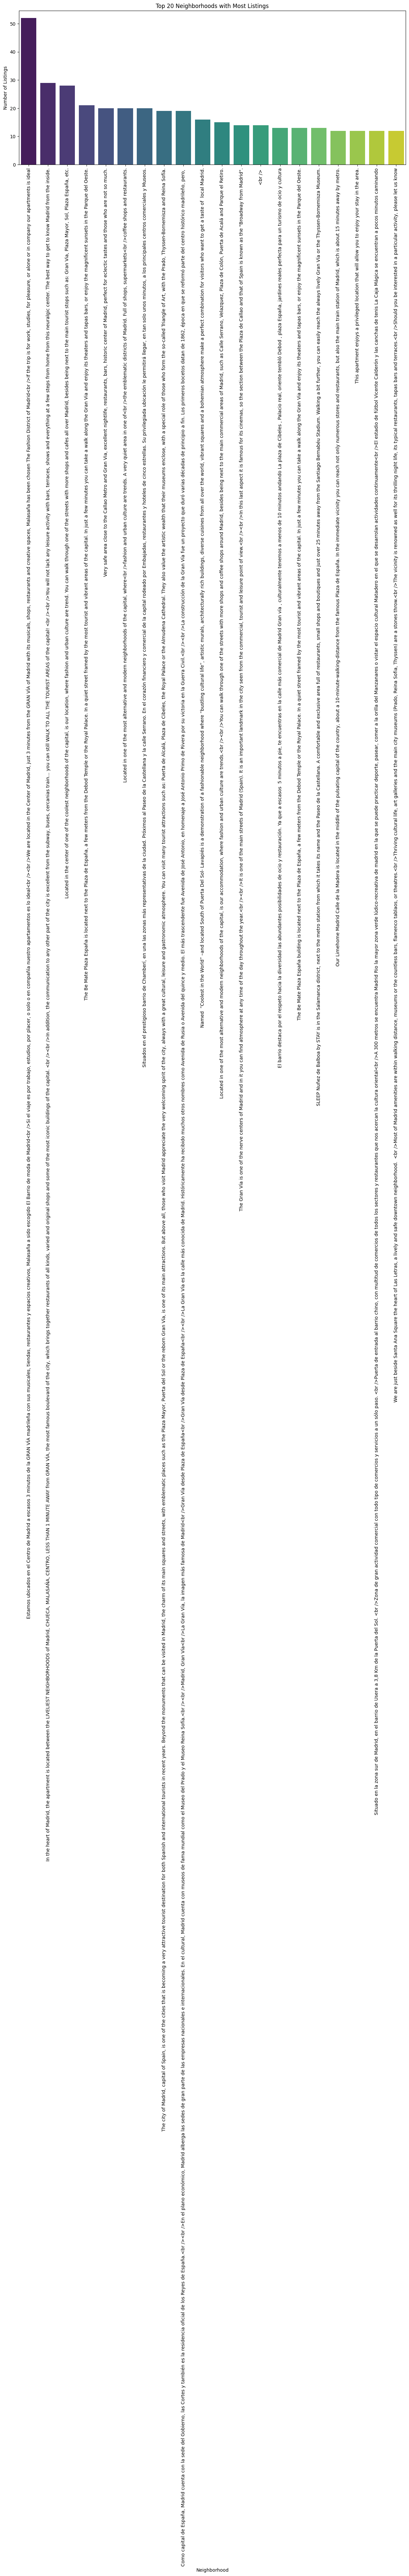

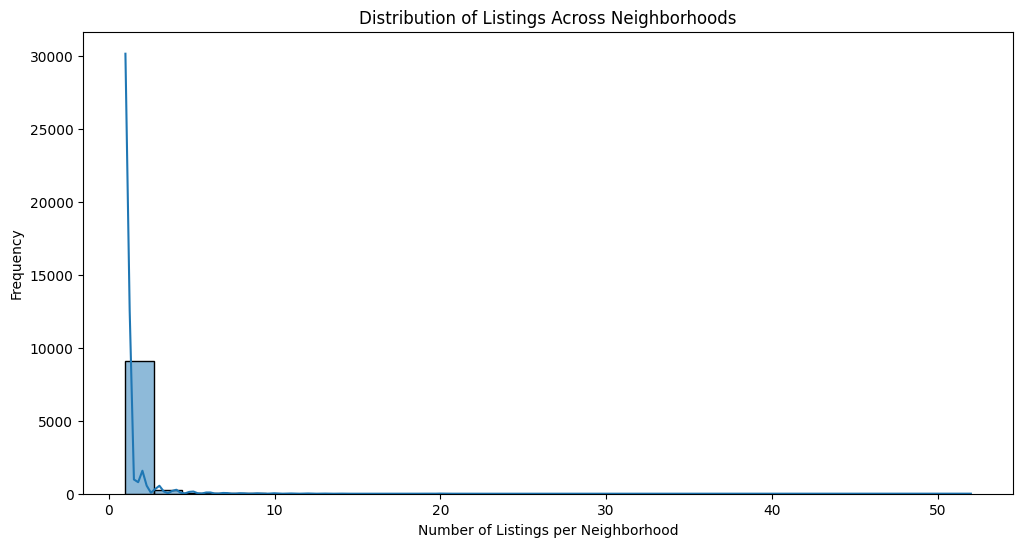

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with the correct path
file_path = "/content/listings_detailed.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows
print("Dataset Overview:")
print(df.info())
print(df.head())

# Identify the relevant column (check for neighborhood-related column names)
neighborhood_col = [col for col in df.columns if 'neigh' in col.lower()]
if neighborhood_col:
    neighborhood_col = neighborhood_col[0]  # Take the first match
    print(f"Using column: {neighborhood_col} for analysis.")
else:
    raise ValueError("No column related to neighborhood found in dataset.")

# Count listings per neighborhood
neighborhood_counts = df[neighborhood_col].value_counts()

# Display top 10 and bottom 10 neighborhoods
print("\nTop 10 neighborhoods with most listings:")
print(neighborhood_counts.head(10))

print("\nBottom 10 neighborhoods with least listings:")
print(neighborhood_counts.tail(10))

# Plot the distribution of listings across neighborhoods
plt.figure(figsize=(15, 6))
sns.barplot(x=neighborhood_counts.index[:20], y=neighborhood_counts.values[:20], palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.title("Top 20 Neighborhoods with Most Listings")
plt.show()

# Check if the distribution is even
plt.figure(figsize=(12, 6))
sns.histplot(neighborhood_counts, bins=30, kde=True)
plt.xlabel("Number of Listings per Neighborhood")
plt.ylabel("Frequency")
plt.title("Distribution of Listings Across Neighborhoods")
plt.show()